# Boosting Techniques

---



### Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

**Answer:** Boosting is an ensemble learning technique that combines multiple weak learners to form a strong learner.

### Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

**Answer:** AdaBoost reweights samples; Gradient Boosting fits models to residual errors.

### Question 3: How does regularization help in XGBoost?

**Answer:** It penalizes complexity and prevents overfitting.

### Question 4: Why is CatBoost efficient for categorical data?

**Answer:** It handles categorical features natively and avoids target leakage.

### Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

**Answer:** Fraud detection, credit scoring, medical diagnosis, ranking systems.

Datasets:
    
    ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
    ● Use sklearn.datasets.fetch_california_housing() for regression tasks.

### Question 6:  Write a Python program to:

 ● Train an AdaBoost Classifier on the Breast Cancer dataset

 ● Print the model accuracy

**Answer:**

In [15]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train the model
ada.fit(X_train, y_train)

# Make predictions
y_pred = ada.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Model Accuracy:", accuracy)


AdaBoost Model Accuracy: 0.9736842105263158


### Question 7:  Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

**Answer:**

In [16]:
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate model using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.7756446042829697


### Question 8:  Write a Python program to:

 ● Train an XGBoost Classifier on the Breast Cancer dataset

 ● Tune the learning rate using GridSearchCV

 ● Print the best parameters and accuracy

**Answer:**

In [17]:

# pip install xgboost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize XGBoost Classifier (clean)
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

# GridSearchCV for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    xgb,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy
print("Best Learning Rate:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))



Best Learning Rate: {'learning_rate': 0.1}
Accuracy: 0.9473684210526315


### Question 9:  Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

**Answer:**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00


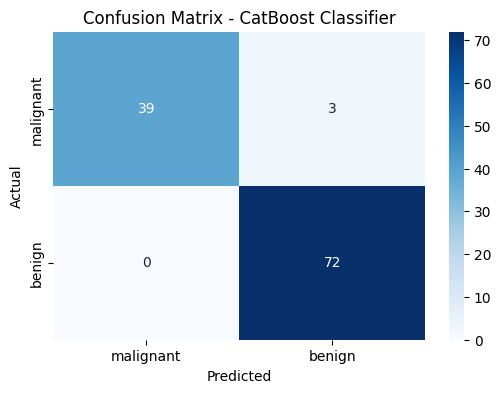

In [19]:
# If not installed, run:
!pip install catboost


# Import required libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize CatBoost Classifier
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=data.target_names,
    yticklabels=data.target_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


### Question 10: FinTech Case Study

**Answer:** You are working for a FinTech company to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numerical and categorical features.

### 1. Data Preprocessing and Handling Missing/Categorical Values

  ### Handling Missing Values

*  **Numerical features:**

    Missing values are handled using median imputation, as it is robust to outliers.

*  **Categorical features:**

    Missing values are replaced with a separate category such as "Unknown".

  ### Handling Categorical Variables

*  **Categorical variables are encoded using:**

    *    One-Hot Encoding (for XGBoost or AdaBoost)

    *    Native categorical handling in CatBoost (no encoding required)

### Handling Imbalanced Dataset

  *    **Since loan default data is imbalanced:**

    *    Use class weights or scale_pos_weight

    *    Avoid relying only on accuracy

    *    Preserve class distribution using Stratified Sampling

### 2. Choice of Boosting Algorithm
####Comparison of Boosting Algorithms
Algorithm---------------------------	                           Suitability

---



AdaBoost   -------------------------	Sensitive to noise, not ideal for real-world financial data

XGBoost--------------------------	Very powerful, needs encoding & careful tuning

CatBoost--------------------------	Best for mixed data with missing values


Final Choice

---

✅ CatBoost Classifier



### Reasons:

*   Handles missing values automatically

*   Supports categorical features natively

*   Performs well on imbalanced datasets

*   Reduces overfitting



###3.Hyperparameter Tuning Strategy
####Tuning Method

*   Use GridSearchCV or RandomizedSearchCV

*   Apply Stratified K-Fold Cross Validation

###Important Hyperparameters

*   iterations – number of trees

*   learning_rate – controls training speed

*   depth – complexity of trees

*   l2_leaf_reg – regularization

*   class_weights – imbalance handling

###4.Evaluation Metrics and Justification

Since loan default prediction is an imbalanced classification problem, accuracy alone is not sufficient.

###Chosen Evaluation Metrics

*   ROC-AUC – measures overall classification ability

*   Precision – reduces false approvals

*   Recall – identifies actual defaulters

*   F1-Score – balances precision and recall

*   Confusion Matrix – business interpretability

###5.Business Benefits of the Model

*   Reduces loan default risk

*   Improves credit decision accuracy

*   Enables data-driven lending

*   Saves financial losses

*   Improves customer trust

*   Automates loan approval process

###Conclusion

A boosting-based machine learning pipeline using CatBoost, proper preprocessing, imbalance handling, and robust evaluation metrics provides an effective solution for predicting loan default and improving financial decision-making.